<a href="https://colab.research.google.com/github/smrutisanchita/CE888/blob/main/Lab_7/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


#### compile and fit model 

In [8]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 0.4744 - accuracy: 0.8524 - val_loss: 0.1039 - val_accuracy: 0.9672
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.0540 - val_accuracy: 0.9846
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0417 - accuracy: 0.9871 - val_loss: 0.0453 - val_accuracy: 0.9879
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0413 - val_accuracy: 0.9883
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0210 - accuracy: 0.9939 - val_loss: 0.0354 - val_accuracy: 0.9902


#### evaluate model

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0277 - accuracy: 0.9917


0.9916999936103821

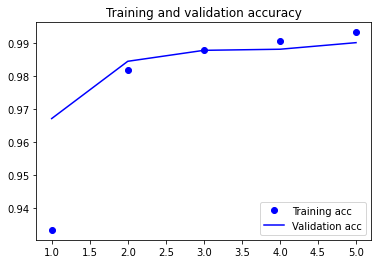

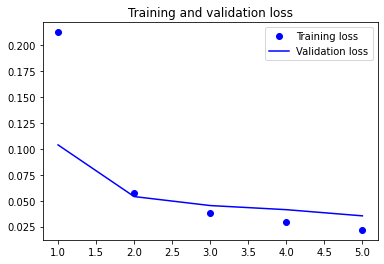

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

### Check model accuracy with Adam optimiser

In [13]:
def create_model():
	# create model	
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model_adam = create_model()
model_adam.fit(train_images,train_labels, epochs=5, batch_size=64, validation_split=0.2)



Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.4828 - accuracy: 0.8468 - val_loss: 0.0885 - val_accuracy: 0.9737
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0577 - accuracy: 0.9814 - val_loss: 0.0485 - val_accuracy: 0.9854
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0380 - accuracy: 0.9874 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0482 - val_accuracy: 0.9855
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0455 - val_accuracy: 0.9881


### 2. Create grid search for  epoch and batch size 

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [64,128,256,512]
epochs = [10,15,20]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_images,train_labels)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.989233 using {'batch_size': 64, 'epochs': 20}
0.988567 (0.001179) with: {'batch_size': 64, 'epochs': 10}
0.987800 (0.000976) with: {'batch_size': 64, 'epochs': 15}
0.989233 (0.000946) with: {'batch_size': 64, 'epochs': 20}
0.986783 (0.000945) with: {'batch_size': 128, 'epochs': 10}
0.988400 (0.001042) with: {'batch_size': 128, 'epochs': 15}
0.987900 (0.000464) with: {'batch_size': 128, 'epochs': 20}
0.986783 (0.000967) with: {'batch_size': 256, 'epochs': 10}
0.987117 (0.000694) with: {'batch_size': 256, 'epochs': 15}
0.988383 (0.000170) with: {'batch_size': 256, 'epochs': 20}
0.986383 (0.000448) with: {'batch_size': 512, 'epochs': 10}
0.987267 (0.001226) with: {'batch_size': 512, 'epochs': 15}
0.987400 (0.001727) with: {'batch_size': 512, 'epochs': 20}


From above , we can say that Batch size :64 and epoch 20 is best 

### 3. implement custom grid search on activation funtion and optimiser

In [2]:
from keras.layers import LeakyReLU
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

activations = ['relu','tanh']
for act_function in activations:

  model1 = models.Sequential()
  model1.add(layers.Conv2D(32, (3, 3), activation=act_function, input_shape=(28, 28, 1)))
  model1.add(layers.MaxPooling2D((2, 2)))
  model1.add(layers.Conv2D(64, (3, 3), activation=act_function))
  model1.add(layers.MaxPooling2D((2, 2)))
  model1.add(layers.Conv2D(64, (3, 3), activation=act_function))
  model1.add(layers.Flatten())
  model1.add(layers.Dense(64, activation=act_function))
  model1.add(layers.Dense(10, activation='softmax'))

  # Compile model
  optimizers = ['adam','SGD','adaGrad']
  for optimizer in optimizers:
    print("Optimizer : ",optimizer, "& Activations: ",act_function," \n")
    model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model1.fit(train_images,train_labels, epochs=20, batch_size=64, validation_split=0.2)
     

Optimizer :  adam & Activations:  relu  

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4799 - accuracy: 0.8539 - val_loss: 0.0799 - val_accuracy: 0.9739
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0584 - val_accuracy: 0.9827
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0416 - accuracy: 0.9868 - val_loss: 0.0450 - val_accuracy: 0.9870
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0432 - val_accuracy: 0.9875
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0418 - val_accuracy: 0.9882
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0195 - accuracy: 0.9930 - val_loss: 0.0393 - val_accuracy: 0.9887
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0142 - accuracy: 0.9956 - val_

In [ ]:
# Write code here
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
#params = {'optimizer' : ['Adam','SGD','Adagrad']}
#scorer =  {'accuracy_score': make_scorer(accuracy_score)}
params = {'epochs':[2,3,4]}


from keras.wrappers.scikit_learn import KerasClassifier
model1 =KerasClassifier(build_fn=model)
# now fit the dataset to the GridSearchCV object.  
gs=GridSearchCV(estimator=model1, param_grid=params, cv=5) 
gs.fit(train_images, train_labels)


TypeError: ignored